# Predicting Stock Prices Using Machine Learning


## Purpose 
The rationale behind retesting the stock data model with the inclusion of new consumer features is to determine if these additional variables enhance the predictive accuracy of stock prices.

## Data Extraction

In [34]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, classification_report
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [40]:
# Define the stock tickers and the date range for data extraction
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'PG', 'XOM', 'NVDA', 'PFE', 'KO', 'TSLA']
start_date = '2013-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Today's date

### Explanation of Data Used

We selected these ten specific stocks—AAPL, MSFT, JNJ, JPM, PG, XOM, NVDA, PFE, KO, and TSLA—because they represent a diverse range of industries, including technology, healthcare, finance, consumer goods, and energy. This diversity helps our model capture a broad spectrum of market dynamics and ensures that it is not overly specialized in one sector. Using ten years' worth of data allows the model to learn from a substantial amount of historical information, encompassing various market cycles, trends, and events. This extensive dataset enhances the model's ability to recognize long-term patterns and make more accurate predictions, as it is trained on a wide array of scenarios and conditions that have influenced stock prices over a significant period.



In [41]:
# Extract historical stock data from Yahoo Finance for each ticker
stock_data = {}
for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# Display the first few rows of the extracted data for each ticker
for ticker in tickers:
    print(f"\nData for {ticker}:")
    print(stock_data[ticker].head())


Data for AAPL:
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725039  560518000
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513933  352965200
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053934  594333600
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959506  484156400
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200

Data for MSFT:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-01-02  27.250000  27.730000  27.150000  27.620001  22.492281  52899300
2013-01-03  27.629999  27.650000  27.160000  27.250000  22.190966  48294400
2013-01-04  27.270000  27.340000  26.730000  26.740000  21.775658  52521100
2013-01-07  26.770000  26.879999  26.639999  26.6

## Data Cleaning: Stock Data
### Futher manipulation done to prepare data to merge with consumer data

In [5]:
# Combine all stock data into a single DataFrame
combined_data = pd.concat(stock_data, axis=1, keys=tickers)

In [7]:
# Check for missing values
missing_values = combined_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 AAPL  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
MSFT  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JNJ   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
JPM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PG    Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
XOM   Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
NVDA  Open         0
      High         0
      Low          0
      Close        0
      Adj Close    0
      Volume       0
PFE   Open         0
      High         0
      Low          0
      Close        0
  

In [9]:
#convert combined stock data into dataframe
all_stock_data = pd.DataFrame(combined_data)
all_stock_data.head()

AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2013-01-02  19.779285  19.821428  19.343929  19.608213  16.725039  560518000   
2013-01-03  19.567142  19.631071  19.321428  19.360714  16.513933  352965200   
2013-01-04  19.177500  19.236786  18.779642  18.821428  16.053934  594333600   
2013-01-07  18.642857  18.903570  18.400000  18.710714  15.959506  484156400   
2013-01-08  18.900356  18.996071  18.616072  18.761070  16.002457  458707200   

                 MSFT                                   ...         KO  \
                 Open       High        Low      Close  ...        Low   
Date                                                    ...              
2013-01-02  27.250000  27.730000  27.150000  27.620001  ...  36.660000   
2013-01-03  27.629999  27.650000  27.160000  27.250000  ...  37.110001   
2013-01-04  27.270000  27.340000  26.730000  26.740000  ...  37.520000   
2013-01-07  26.770000  26.879999  26.639999  26.690001  ...  37.099998   
2013-01-08  26.750000  26.790001  26.459999  26.549999  ...  36.910000   

                                                TSLA                      \
                Close  Adj Close    Volume      Open      High       Low   
Date                                                                       
2013-01-02  37.599998  26.194855  21872400  2.333333  2.363333  2.314000   
2013-01-03  37.599998  26.194855  16357900  2.345333  2.363333  2.316667   
2013-01-04  37.660000  26.236650  15311300  2.320000  2.320000  2.261333   
2013-01-07  37.299999  25.985842  14610200  2.320000  2.320000  2.260000   
2013-01-08  37.040001  25.804720  14324300  2.300000  2.300000  2.207333   

                                          
               Close Adj Close    Volume  
Date                                      
2013-01-02  2.357333  2.357333  17922000  
2013-01-03  2.318000  2.318000  11130000  
2013-01-04  2.293333  2.293333  10110000  
2013-01-07  2.289333  2.289333   6630000  
2013-01-08  2.245333  2.245333  19260000  

[5 rows x 60 columns]

In [10]:
#Reduce frequency of data for each stock, instead of daily values, I want monthly values because consumer data is monthly. 
# Resample the data by month and calculate the mean
monthly_stock_data = all_stock_data.resample('ME').mean()

print(monthly_stock_data)

                  AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2013-01-31   17.860119   18.014558   17.606071   17.779371   15.165107   
2013-02-28   16.375131   16.543966   16.146654   16.314605   13.979897   
2013-03-31   15.786125   15.957268   15.619214   15.780036   13.538196   
2013-04-30   14.991672   15.198328   14.811510   14.991607   12.861778   
2013-05-31   15.942889   16.130649   15.767695   15.944740   13.744991   
...                ...         ...         ...         ...         ...   
2024-03-31  172.789000  174.319500  171.262498  172.696500  172.462580   
2024-04-30  169.661363  171.292272  168.448183  169.604545  169.374811   
2024-05-31  186.431817  187.820910  185.055909  186.285909  186.208508   
2024-06-30  205.994735  209.036318  203.920001  206.263158  206.263158   
2024-07-31  214.119995  218.945000  21

In [11]:
#Convert monthly stock data into dataframe
monthly_stock_data = pd.DataFrame(monthly_stock_data)

In [16]:
#Loop through dataframe to remove the day in date and only show month and year.
monthly_stock_data_reset = monthly_stock_data.reset_index() 
monthly_stock_data_reset["YearMonth"] = monthly_stock_data_reset["Date"].dt.to_period("M")
monthly_stock_data_reset.head()

In [18]:
#Dropped the date column and set the index to YearMonth to make it easier to merge with other dataframe
monthly_stock_df = monthly_stock_data_reset.drop(columns=["Date"])
monthly_stock_df.set_index("YearMonth", inplace=True)


/var/folders/fg/8tsgxb6s07x1cjstms_qn8pc0000gn/T/ipykernel_24726/3667678457.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly_stock_df = monthly_stock_data_reset.drop(columns=["Date"])


In [19]:
#Kept getting an error when trying to merge data because4 the stock data had a multiindex. Below I flatten the stock dataframe. 
monthly_stock_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in monthly_stock_df.columns]
monthly_stock_df.head()

,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,MSFT_Close,...,KO_Low,KO_Close,KO_Adj Close,KO_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
YearMonth,,,,,,,,,,,,,,,,,,,,,
2013-01,17.860119,18.014558,17.606071,17.779371,15.165107,6.249249e+08,27.243333,27.491428,27.026190,27.236667,...,36.996191,37.263333,25.960306,1.441701e+07,2.344127,2.377079,2.307587,2.345905,2.345905,2.033186e+07
2013-02,16.375131,16.543966,16.146654,16.314605,13.979897,4.917913e+08,27.723158,27.896316,27.525789,27.704211,...,37.629999,37.962632,26.447488,1.710207e+07,2.501895,2.543368,2.455088,2.491088,2.491088,3.493895e+07
2013-03,15.786125,15.957268,15.619214,15.780036,13.538196,4.588438e+08,28.087500,28.263000,27.934000,28.141000,...,39.124500,39.390500,27.562265,1.442144e+07,2.466967,2.508733,2.435633,2.469533,2.469533,2.224125e+07
2013-04,14.991672,15.198328,14.811510,14.991607,12.861778,4.983404e+08,29.642273,30.087727,29.457728,29.870909,...,41.180000,41.510000,29.128177,1.444419e+07,3.062030,3.160091,3.002636,3.082364,3.082364,5.560098e+07
2013-05,15.942889,16.130649,15.767695,15.944740,13.744991,4.294332e+08,33.760909,34.123636,33.576818,33.950909,...,41.876818,42.157273,29.582380,1.310105e+07,5.434545,5.673364,5.174939,5.426606,5.426606,2.258324e+08


## Data Cleaning: Survey of Consumer Data

### Details on Consumer Features
The selected consumer features—Index of Consumer Sentiment, Index of Consumer Expectations, Index of Current Condition, Probability of Adequate Retirement Income, Probability of Increase in Stock Market in Next Year, and Current Value of Stock Market Investments—provide valuable insights into the broader economic and financial environment that could impact stock performance. These indicators were chosen because they collectively reflect consumer confidence, economic expectations, and financial health, all of which are crucial factors that can influence market trends and investor behavior. By incorporating these features, the model can potentially capture more complex relationships and dependencies between consumer behavior and stock prices, leading to improved predictive performance and more robust investment strategies.

In [20]:
path = "Survey Of Consumers (2013-2024).csv"
consumers_df = pd.read_csv(path)
consumers_df.head()

,yyyymm,ics_all,ice_all,icc_all,pssa_mean_all,pstk_mean_all,inv_r50_all
0,201301,73.8,66.6,85.0,34.2,48.7,206013
1,201302,77.6,70.2,89.0,34.3,52.4,281528
2,201303,78.6,70.8,90.7,34.7,50.9,274527
3,201304,76.4,67.8,89.9,37.8,54.5,215913
4,201305,84.5,75.8,98.0,35.0,55.9,336904


In [21]:
#Rename Column Names 
consumers_df = consumers_df.rename( columns={"yyyymm":"YearMonth", 
                                              "ics_all":"Index of Consumer Sentiment", 	
                                              "ice_all":"Index of Consumer Expectations",
                                              "icc_all":"Index of Current Condition",
                                              "pssa_mean_all":"Probability of Adequate Retirement Income",
                                              "pstk_mean_all":"Probability of Increase in Stock Market in Next Year",
                                              "inv_r50_all": " Current Value of Stock Market Investments"})

In [22]:
#Convert Date from YYYYmm to YYYY-MM
consumers_df["YearMonth"] = consumers_df["YearMonth"].astype(str)
consumers_df["YearMonth"] = consumers_df["YearMonth"].apply(lambda x: f"{x[:4]}-{x[4:]}")
consumers_df.head()

,YearMonth,Index of Consumer Sentiment,Index of Consumer Expectations,Index of Current Condition,Probability of Adequate Retirement Income,Probability of Increase in Stock Market in Next Year,Current Value of Stock Market Investments
0,2013-01,73.8,66.6,85.0,34.2,48.7,206013
1,2013-02,77.6,70.2,89.0,34.3,52.4,281528
2,2013-03,78.6,70.8,90.7,34.7,50.9,274527
3,2013-04,76.4,67.8,89.9,37.8,54.5,215913
4,2013-05,84.5,75.8,98.0,35.0,55.9,336904


In [23]:
#Reset index on the monthly stock data to do proper merge
monthly_stock_df_reset = monthly_stock_df.reset_index()
monthly_stock_df_reset.head()

,YearMonth,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,...,KO_Low,KO_Close,KO_Adj Close,KO_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume
0,2013-01,17.860119,18.014558,17.606071,17.779371,15.165107,6.249249e+08,27.243333,27.491428,27.026190,...,36.996191,37.263333,25.960306,1.441701e+07,2.344127,2.377079,2.307587,2.345905,2.345905,2.033186e+07
1,2013-02,16.375131,16.543966,16.146654,16.314605,13.979897,4.917913e+08,27.723158,27.896316,27.525789,...,37.629999,37.962632,26.447488,1.710207e+07,2.501895,2.543368,2.455088,2.491088,2.491088,3.493895e+07
2,2013-03,15.786125,15.957268,15.619214,15.780036,13.538196,4.588438e+08,28.087500,28.263000,27.934000,...,39.124500,39.390500,27.562265,1.442144e+07,2.466967,2.508733,2.435633,2.469533,2.469533,2.224125e+07
3,2013-04,14.991672,15.198328,14.811510,14.991607,12.861778,4.983404e+08,29.642273,30.087727,29.457728,...,41.180000,41.510000,29.128177,1.444419e+07,3.062030,3.160091,3.002636,3.082364,3.082364,5.560098e+07
4,2013-05,15.942889,16.130649,15.767695,15.944740,13.744991,4.294332e+08,33.760909,34.123636,33.576818,...,41.876818,42.157273,29.582380,1.310105e+07,5.434545,5.673364,5.174939,5.426606,5.426606,2.258324e+08


In [24]:
#had to convert the YearMonth in the monthly stock from a datetime index to a string to match the consumer df 
monthly_stock_df_reset["YearMonth"] = monthly_stock_df_reset["YearMonth"].astype(str)

In [25]:
#Merged the stock data with the consumer data on the YearMonth column 
merged_stock_consumers_df = pd.merge(monthly_stock_df_reset, consumers_df, on='YearMonth')
merged_stock_consumers_df.head()

,YearMonth,AAPL_Open,AAPL_High,AAPL_Low,AAPL_Close,AAPL_Adj Close,AAPL_Volume,MSFT_Open,MSFT_High,MSFT_Low,...,TSLA_Low,TSLA_Close,TSLA_Adj Close,TSLA_Volume,Index of Consumer Sentiment,Index of Consumer Expectations,Index of Current Condition,Probability of Adequate Retirement Income,Probability of Increase in Stock Market in Next Year,Current Value of Stock Market Investments
0,2013-01,17.860119,18.014558,17.606071,17.779371,15.165107,6.249249e+08,27.243333,27.491428,27.026190,...,2.307587,2.345905,2.345905,2.033186e+07,73.8,66.6,85.0,34.2,48.7,206013
1,2013-02,16.375131,16.543966,16.146654,16.314605,13.979897,4.917913e+08,27.723158,27.896316,27.525789,...,2.455088,2.491088,2.491088,3.493895e+07,77.6,70.2,89.0,34.3,52.4,281528
2,2013-03,15.786125,15.957268,15.619214,15.780036,13.538196,4.588438e+08,28.087500,28.263000,27.934000,...,2.435633,2.469533,2.469533,2.224125e+07,78.6,70.8,90.7,34.7,50.9,274527
3,2013-04,14.991672,15.198328,14.811510,14.991607,12.861778,4.983404e+08,29.642273,30.087727,29.457728,...,3.002636,3.082364,3.082364,5.560098e+07,76.4,67.8,89.9,37.8,54.5,215913
4,2013-05,15.942889,16.130649,15.767695,15.944740,13.744991,4.294332e+08,33.760909,34.123636,33.576818,...,5.174939,5.426606,5.426606,2.258324e+08,84.5,75.8,98.0,35.0,55.9,336904


# Train Test Split & PCA: Merged Data 

In [28]:
#Set YearMonth as index to avoid conflict with scaling
merged_stock_consumers_df.set_index("YearMonth", inplace=True)

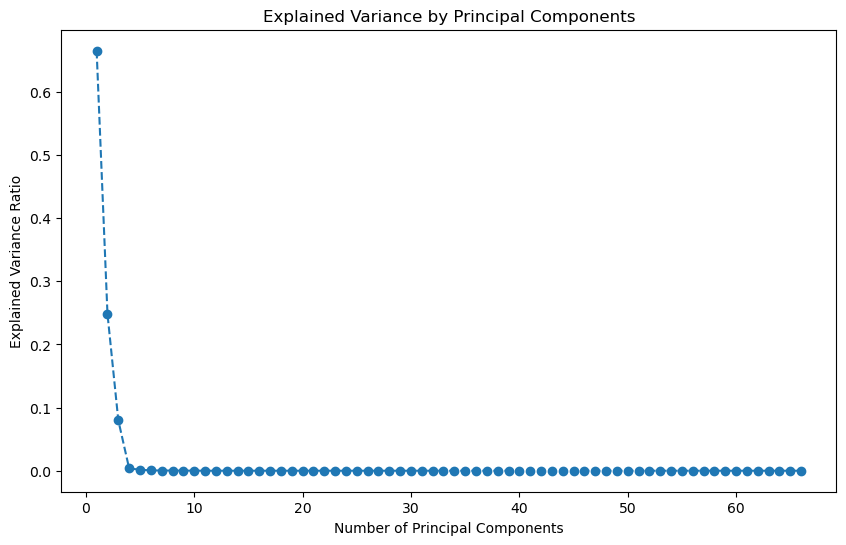

Cumulative explained variance: [0.665149   0.91358926 0.99339372 0.99705063 0.99864234 0.99914717
 0.99948328 0.99974552 0.99989836 0.99999992 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
Number of components explaining 95% variance: 3


In [29]:
# Apply PCA to find the best number of components to explain the variance 
pca = PCA()
df_pca = pca.fit_transform(merged_stock_consumers_df)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Display the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative explained variance: {cumulative_explained_variance}")

# Optionally, choose the number of components that explain a desired amount of variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1  # 95% variance
print(f"Number of components explaining 95% variance: {n_components}")

In [30]:
# Function to extract "Close" from dataframe as the target variable and perform train-test split with y value in loop
def extract_target(data, tickers, time_step=60):
    X_list, y_list = [], []
    # Loop through each ticker to extract the closing prices as the target variable
    for ticker in tickers:
        # Select the closing price column
        close_column = f"{tickers}_Close"
        if close_column not in data.columns:
            raise KeyError(f"Column {close_column} not found in the DataFrame")
    
        close_prices = data[close_column].values.reshape(-1, 1)
        
        # Extract all columns except the target variable column
        features = data.drop(columns=[close_column]).values

        # Create sequences of data points
        for i in range(time_step, len(close_prices)):
            X_list.append(features[i-time_step:i])
            y_list.append(close_prices[i, 0])
    
    # Convert lists to numpy arrays
    X = np.array(X_list)
    y = np.array(y_list)


    # Reshape X to 2D array for PCA and scaling
    X_reshaped = X.reshape(X.shape[0], -1)
    
    return X_reshaped, y


# Support Vector Regression Model

Preparing data for AAPL...
Training SVR model for AAPL...
AAPL - MSE: 410.5833283772423, R2: 0.7902426280903555


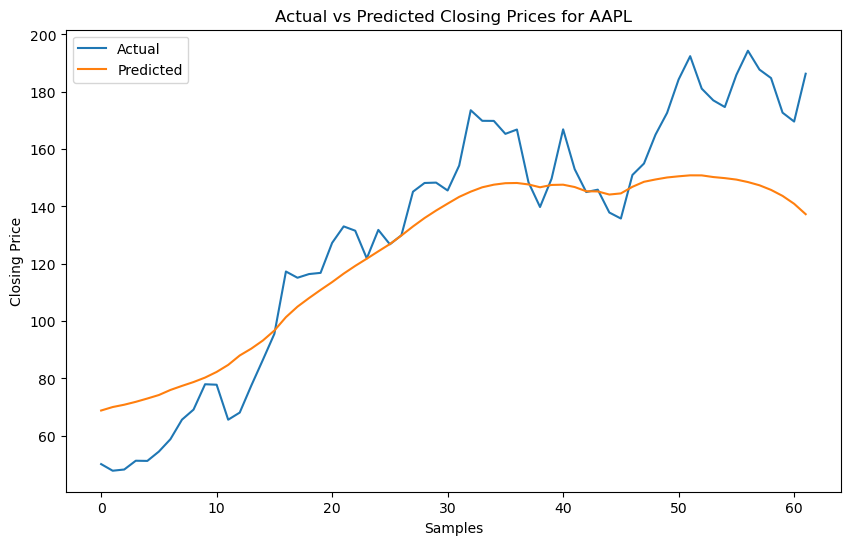

Preparing data for MSFT...
Training SVR model for MSFT...
MSFT - MSE: 4030.731411512516, R2: 0.3558936271446904


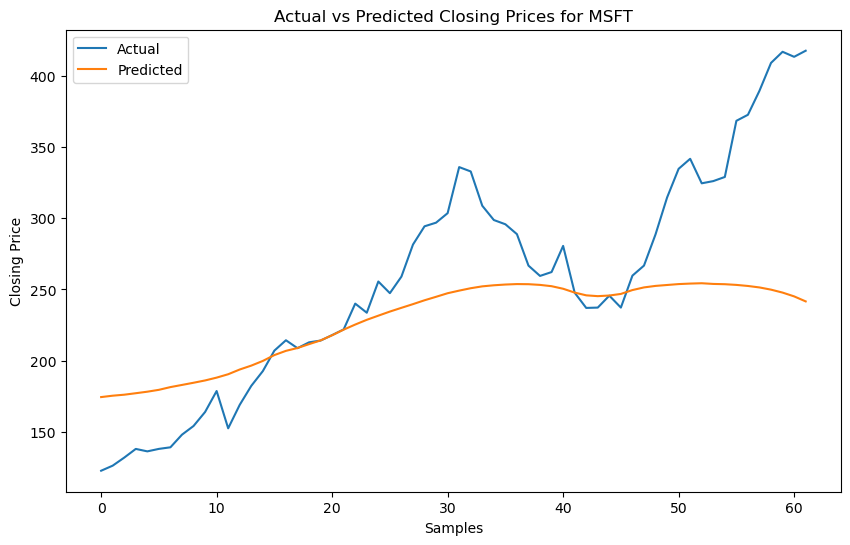

Preparing data for JNJ...
Training SVR model for JNJ...
JNJ - MSE: 29.35210931534717, R2: 0.6588627094391177


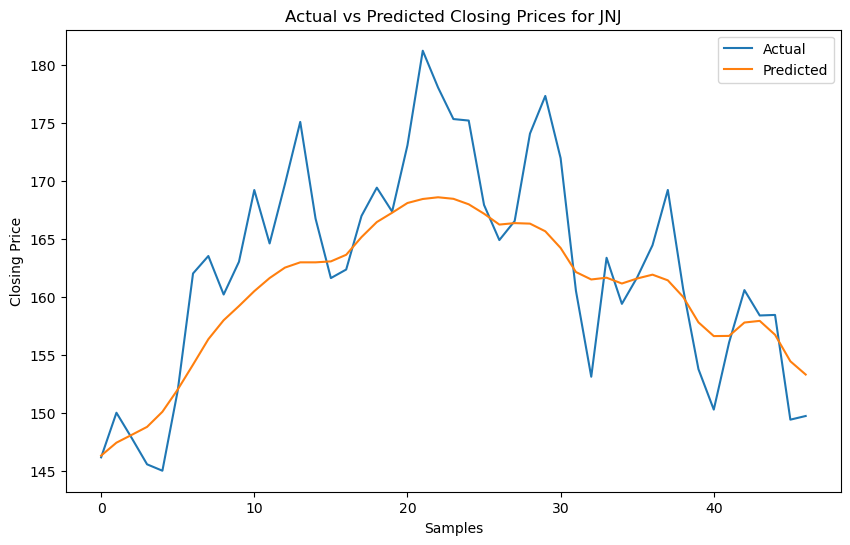

Preparing data for JPM...
Training SVR model for JPM...
JPM - MSE: 457.75271962237025, R2: 0.21827951793131417


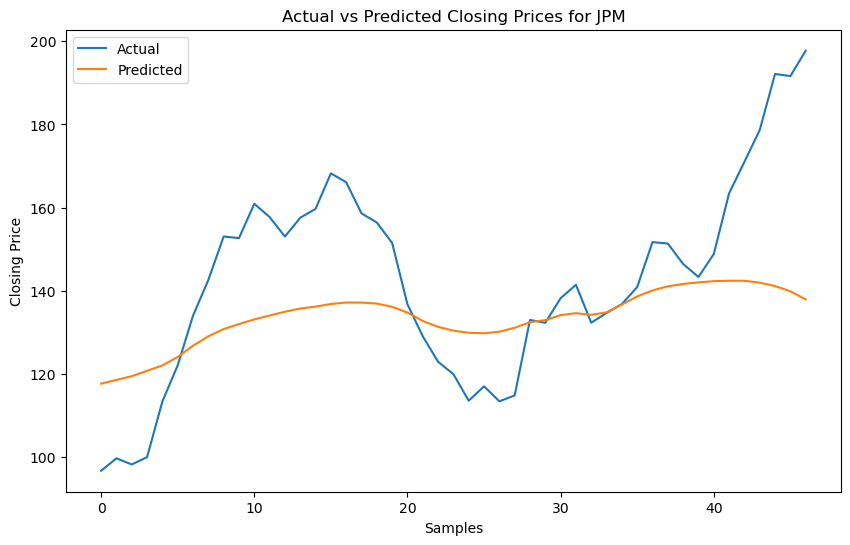

Preparing data for PG...
Training SVR model for PG...
PG - MSE: 149.19550284808955, R2: -1.3536932302038096


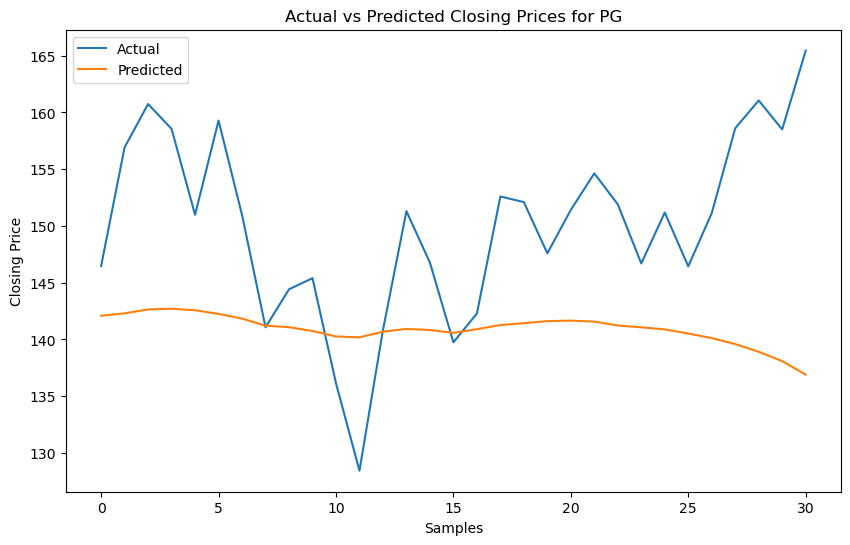

Preparing data for XOM...
Training SVR model for XOM...
XOM - MSE: 168.19156696286774, R2: 0.767627028607819


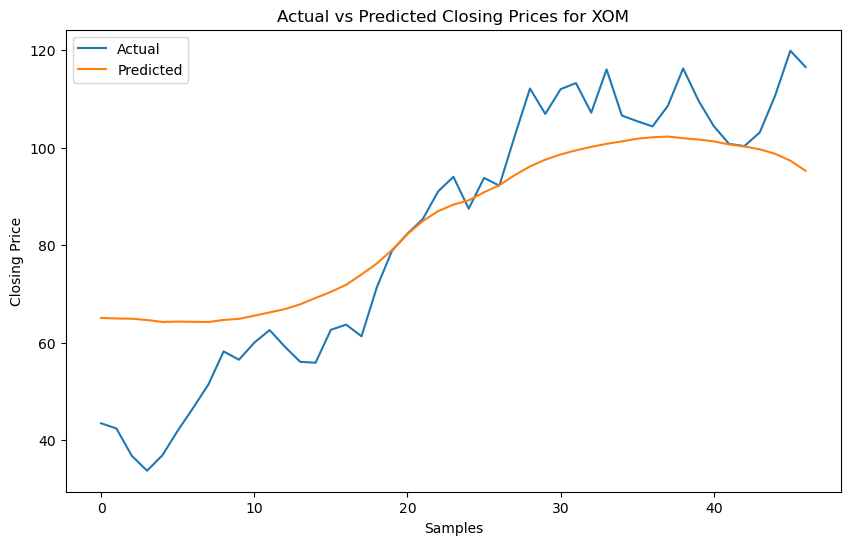

Preparing data for NVDA...
Training SVR model for NVDA...
NVDA - MSE: 172.6411290904782, R2: 0.6041186441019215


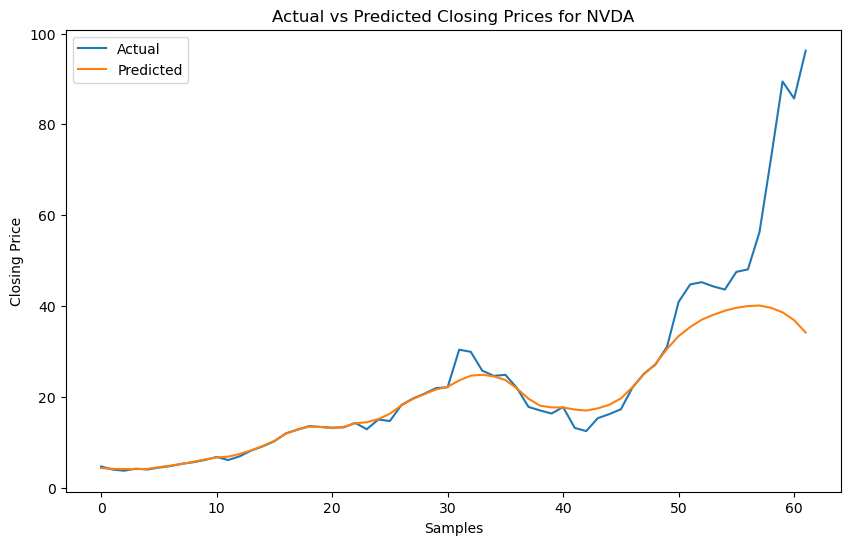

Preparing data for PFE...
Training SVR model for PFE...
PFE - MSE: 6.6201292611258005, R2: 0.8990281357512614


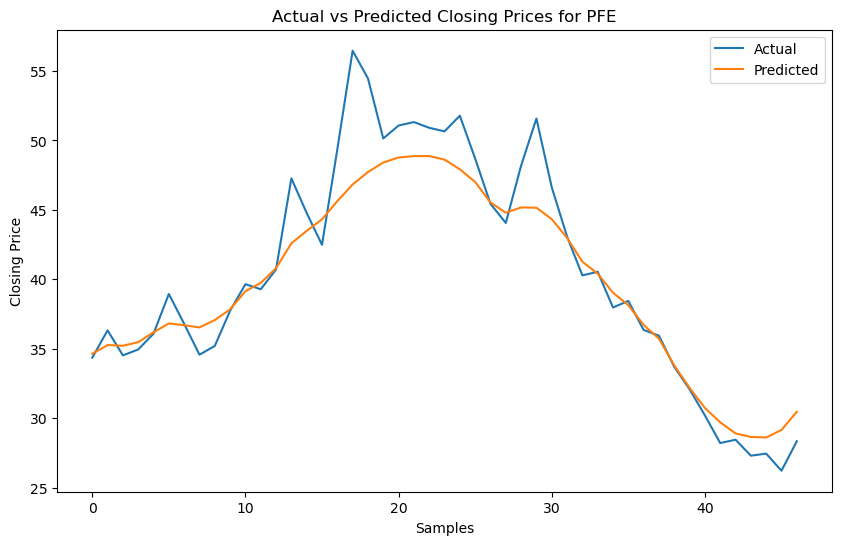

Preparing data for KO...
Training SVR model for KO...
KO - MSE: 4.117195708212466, R2: 0.30088111433858555


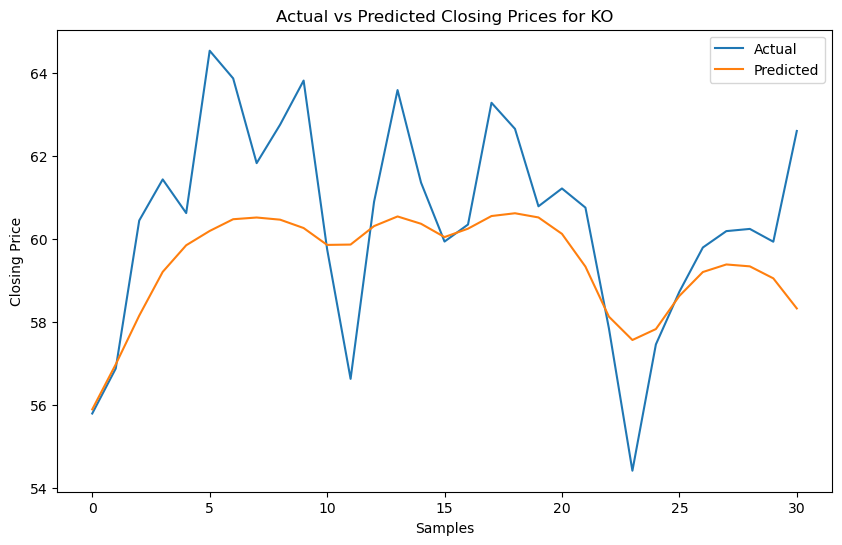

Preparing data for TSLA...
Training SVR model for TSLA...
TSLA - MSE: 6232.397815544228, R2: 0.377621304469724


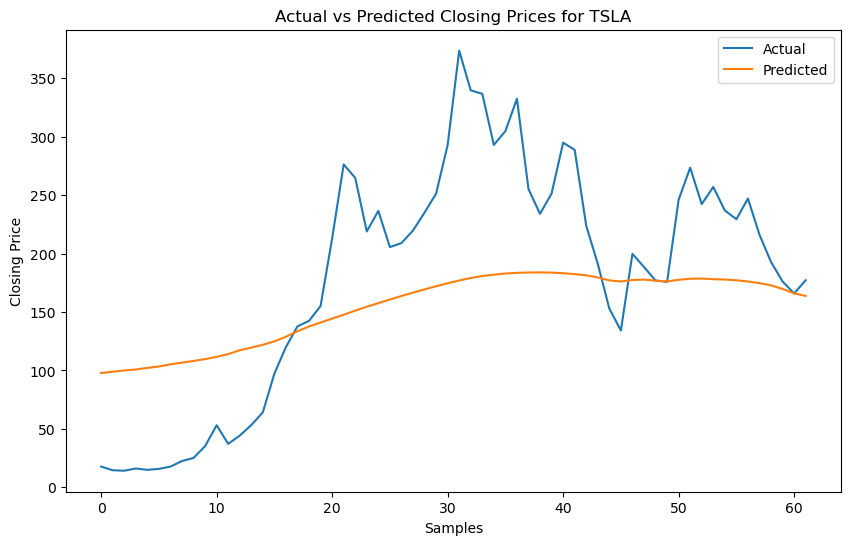

              MSE        R2
AAPL   410.583328  0.790243
MSFT  4030.731412  0.355894
JNJ     29.352109  0.658863
JPM    457.752720  0.218280
PG     149.195503 -1.353693
XOM    168.191567  0.767627
NVDA   172.641129  0.604119
PFE      6.620129  0.899028
KO       4.117196  0.300881
TSLA  6232.397816  0.377621


In [31]:
# set n_components to 3 as PCA analysis revealed.
time_step = 60
n_components = 3

#Train and evaluate the SVR model for each ticker
models = {}
scalers = {}
pca_models = {}
results = {}

# Train and evaluate the SVR model for each ticker
for ticker in tickers:
    print(f"Preparing data for {ticker}...")
    try:
        X, y = extract_target(merged_stock_consumers_df, ticker, time_step)

    except KeyError as e:
        print(e)
        continue   
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply PCA
    pca = PCA(n_components=48)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train the SVR model
    print(f"Training SVR model for {ticker}...")
    svr = SVR()
    svr.fit(X_train_pca, y_train)
    
    # Predict the target variable on the test set
    y_pred = svr.predict(X_test_pca)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the model, scaler, PCA model, and results
    models[ticker] = svr
    scalers[ticker] = scaler
    pca_models[ticker] = pca
    results[ticker] = {'MSE': mse, 'R2': r2}
    
    print(f"{ticker} - MSE: {mse}, R2: {r2}")
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Actual vs Predicted Closing Prices for {ticker}')
    plt.xlabel('Samples')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

### Discussion of SVR Results
The model's performance varied significantly across different stocks, as evidenced by the Mean Squared Error (MSE) and R-squared (R²) values.
The SVR model generally performed best on the PFE (Pfizer Inc.) stock with an R² value of 0.90. The model also did well for stocks AAPL and XOM, showing high predictive accuracy. However, for stocks such as PG and TSLA, the model struggled to capture the underlying patterns, resulting in poor performance. Overall, the model was underfit, with less that 50% accuracy score for 5/10 of the stocks tested in this model. While SVR can be effective for certain stocks, it may require further tuning or different modeling approaches to improve accuracy across all stocks.

# XGBoost Model 

Preparing data for AAPL...
Training XGBoost Regressor model for AAPL...
AAPL accurary measures- MSE: 3.3688367736772936e-06, R2: 0.9999999982789405, Accuracy: 0.9999999982789405


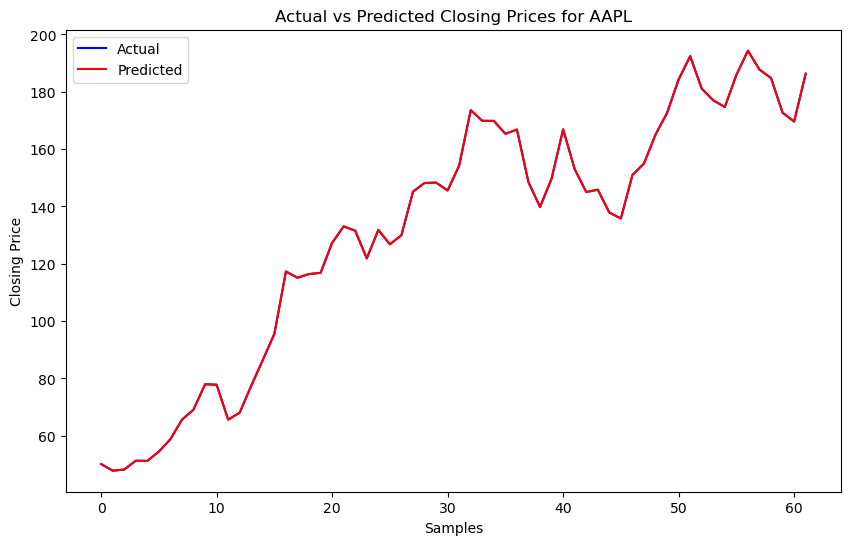

Preparing data for MSFT...
Training XGBoost Regressor model for MSFT...
MSFT accurary measures- MSE: 8.052594750362456e-06, R2: 0.9999999987132043, Accuracy: 0.9999999987132043


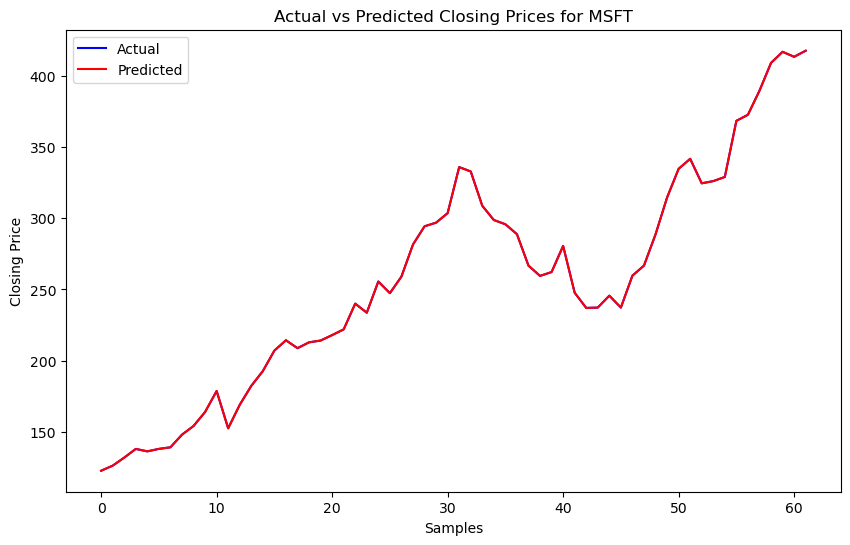

Preparing data for JNJ...
Training XGBoost Regressor model for JNJ...
JNJ accurary measures- MSE: 1.1313638088696658e-06, R2: 0.9999999868510171, Accuracy: 0.9999999868510171


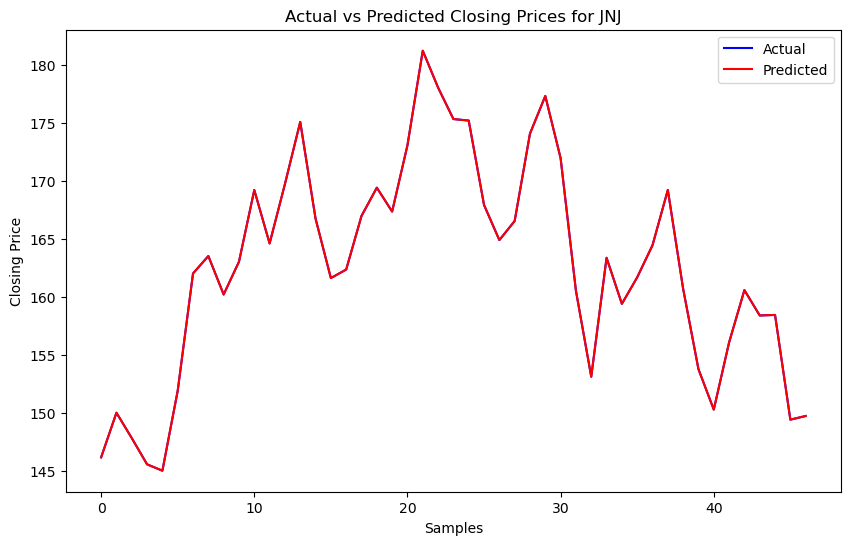

Preparing data for JPM...
Training XGBoost Regressor model for JPM...
JPM accurary measures- MSE: 2.4369860869877627e-06, R2: 0.9999999958382728, Accuracy: 0.9999999958382728


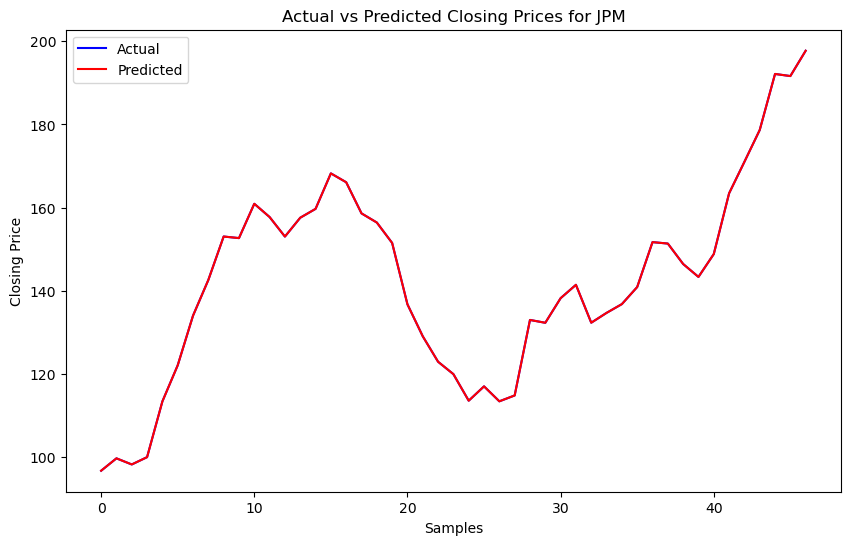

Preparing data for PG...
Training XGBoost Regressor model for PG...
PG accurary measures- MSE: 1.7358736769193908e-05, R2: 0.9999997261503166, Accuracy: 0.9999997261503166


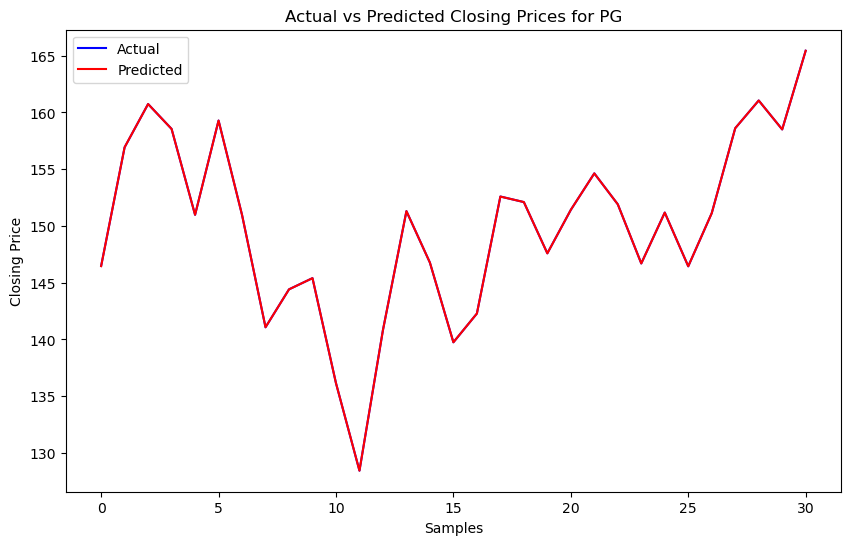

Preparing data for XOM...
Training XGBoost Regressor model for XOM...
XOM accurary measures- MSE: 1.2701502866142395e-06, R2: 0.9999999982451642, Accuracy: 0.9999999982451642


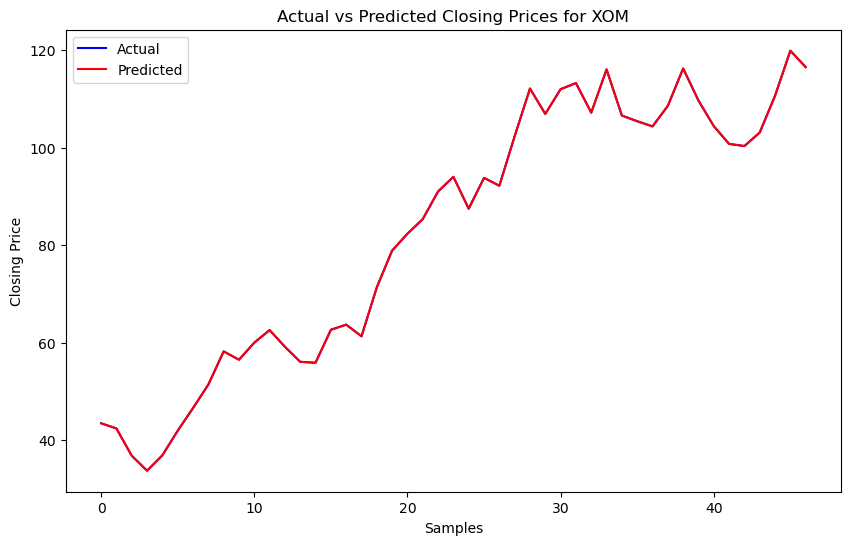

Preparing data for NVDA...
Training XGBoost Regressor model for NVDA...
NVDA accurary measures- MSE: 1.0145064272759836e-06, R2: 0.9999999976736471, Accuracy: 0.9999999976736471


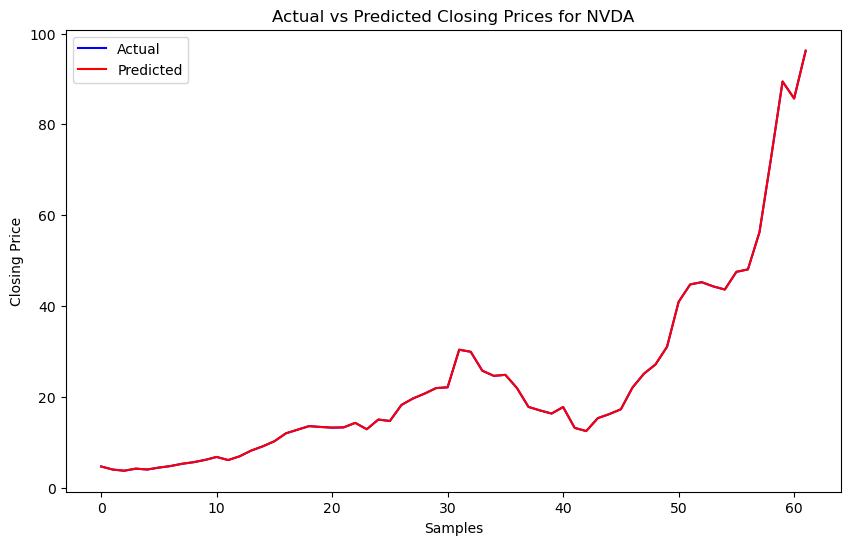

Preparing data for PFE...
Training XGBoost Regressor model for PFE...
PFE accurary measures- MSE: 1.591130931285116e-06, R2: 0.9999999757316738, Accuracy: 0.9999999757316738


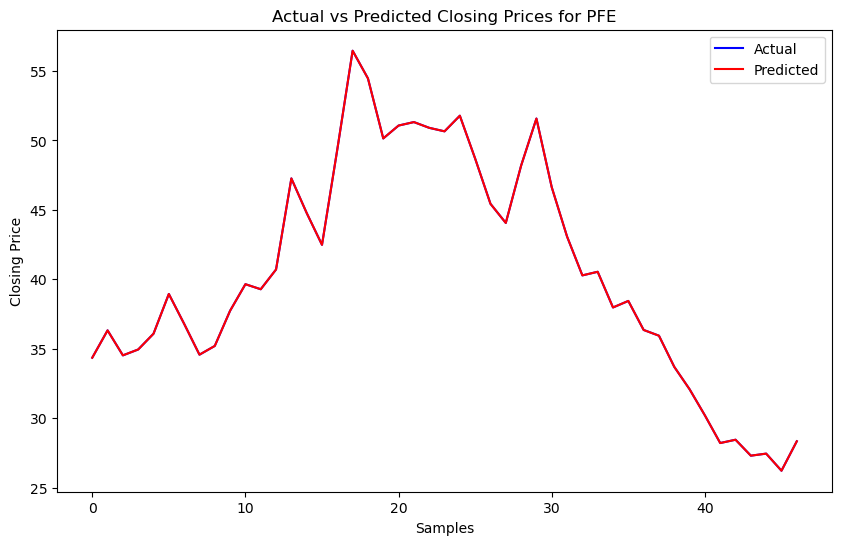

Preparing data for KO...
Training XGBoost Regressor model for KO...
KO accurary measures- MSE: 2.3870596262229715e-06, R2: 0.9999995946662281, Accuracy: 0.9999995946662281


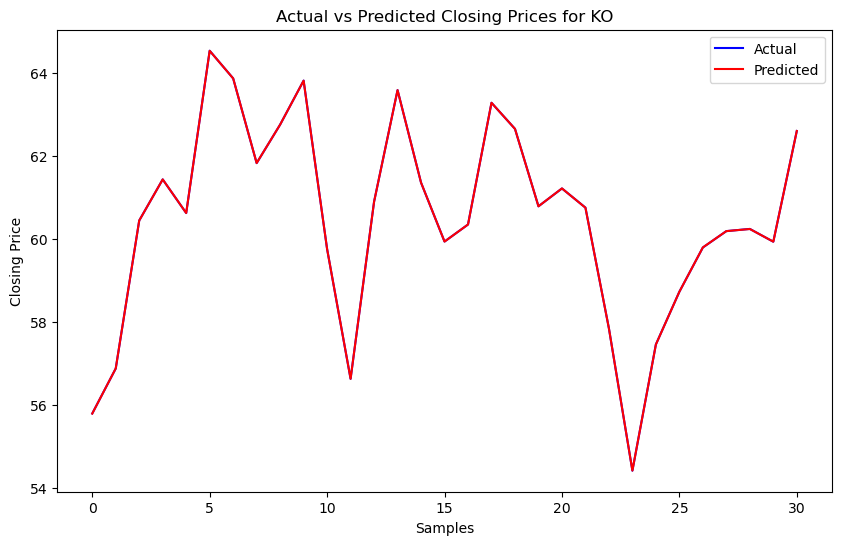

Preparing data for TSLA...
Training XGBoost Regressor model for TSLA...
TSLA accurary measures- MSE: 8.695187699329347e-05, R2: 0.9999999913168258, Accuracy: 0.9999999913168258


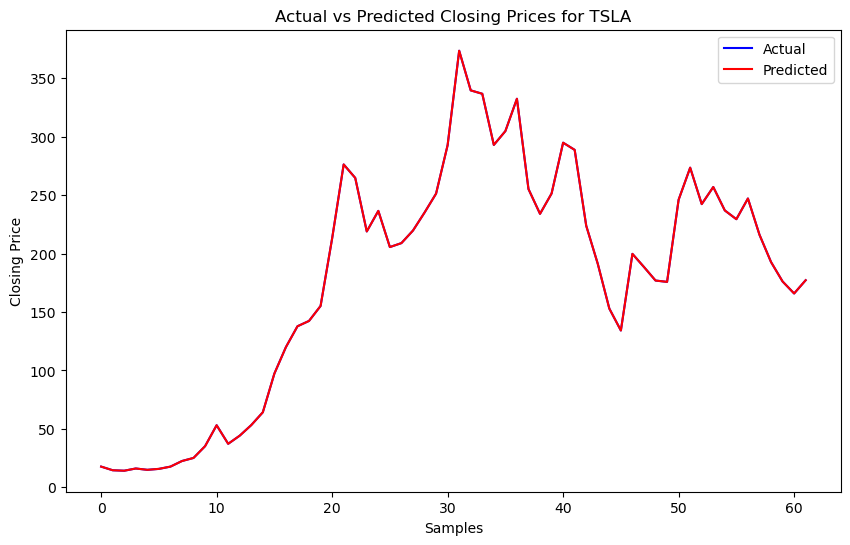

           MSE   R2
AAPL  0.000003  1.0
MSFT  0.000008  1.0
JNJ   0.000001  1.0
JPM   0.000002  1.0
PG    0.000017  1.0
XOM   0.000001  1.0
NVDA  0.000001  1.0
PFE   0.000002  1.0
KO    0.000002  1.0
TSLA  0.000087  1.0


In [37]:
time_step = 60
n_components = 3 # Number of components recommended

models = {}
scalers = {}
pca_models = {}
results = {}

# Train and evaluate the XGBoost Regressor model for each ticker
for ticker in tickers:
    print(f"Preparing data for {ticker}...")
    try:
        X, y = extract_target(merged_stock_consumers_df, ticker, time_step)
    except KeyError as e:
        print(e)
        continue
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Standardize the data
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train the XGBoost Regressor model
    print(f"Training XGBoost Regressor model for {ticker}...")
    xgbr = XGBRegressor()
    xgbr.fit(X_train_pca, y_train)
    
    # Predict the target variable on the test set
    y_pred = xgbr.predict(X_test_pca)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = xgbr.score(X_test_pca, y_test)

    
    # Store the model, scaler, PCA model, and results
    models[ticker] = xgbr
    scalers[ticker] = scaler
    pca_models[ticker] = pca
    results[ticker] = {'MSE': mse, 'R2': r2}
    
    print(f"{ticker} accurary measures- MSE: {mse}, R2: {r2}, Accuracy: {accuracy}")
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual', color='b')
    plt.plot(y_pred, label='Predicted', color='r')
    plt.title(f'Actual vs Predicted Closing Prices for {ticker}')
    plt.xlabel('Samples')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

### Discussion of XGBoost Results
The XGBoost model results indicate an overfitting problem, as evidenced by the near-perfect R² values of 1.0 and extremely low Mean Squared Error (MSE) values for all stocks. I tried regularization Techniques by implementing stronger parameters in XGBoost and increasing min_child_weight, decreasing max_depth, and adjusting subsample and colsample_bytree to limit the model's complexity. Additionally, I changed from standard scaler to minmaxscaler to reduce overfitting. However, even when the above techniques were applied to the model, the results were still overfit. Overall, the XGBoost model is not a good predictor of close value for the given stock data and date range. 

Preparing data for AAPL...
Training Linear Regression model for AAPL...
AAPL - MSE: 468.327162752893, R2: 0.7607426603481348


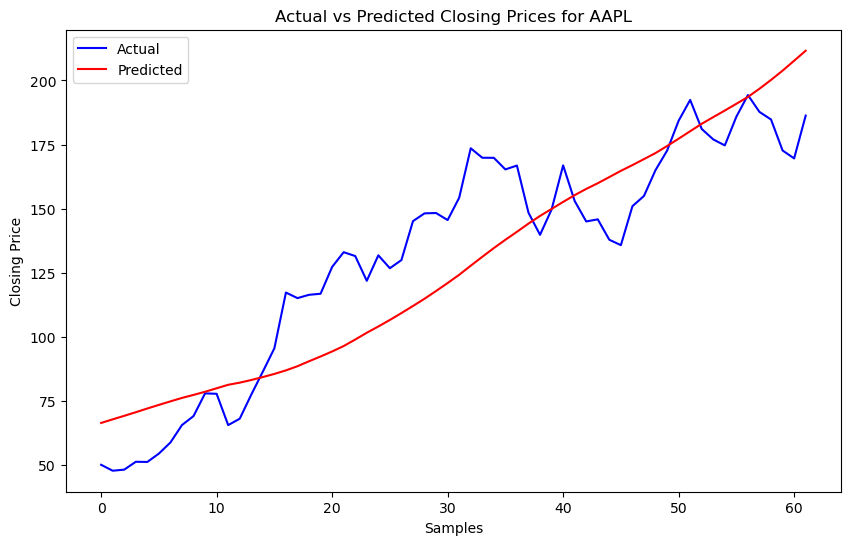

Preparing data for MSFT...
Training Linear Regression model for MSFT...
MSFT - MSE: 1508.760100204201, R2: 0.7589018229109251


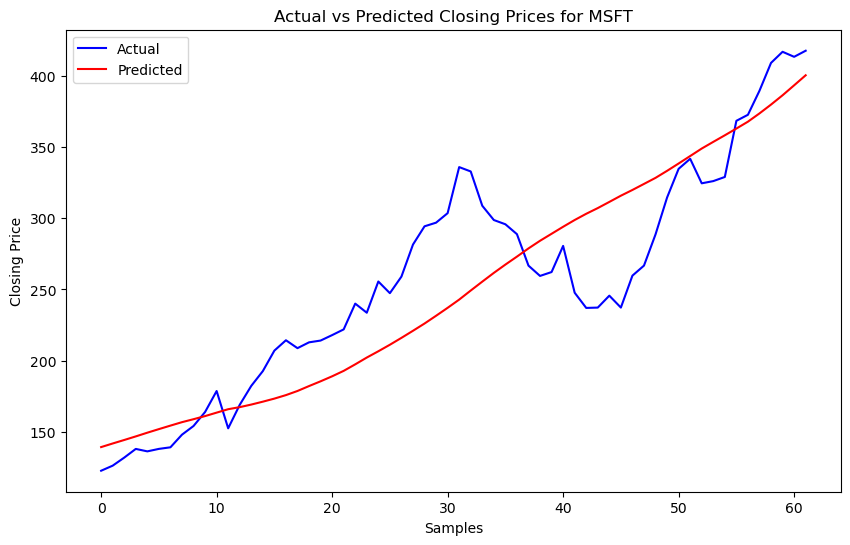

Preparing data for JNJ...
Training Linear Regression model for JNJ...
JNJ - MSE: 174.70187099588082, R2: -1.030427261194828


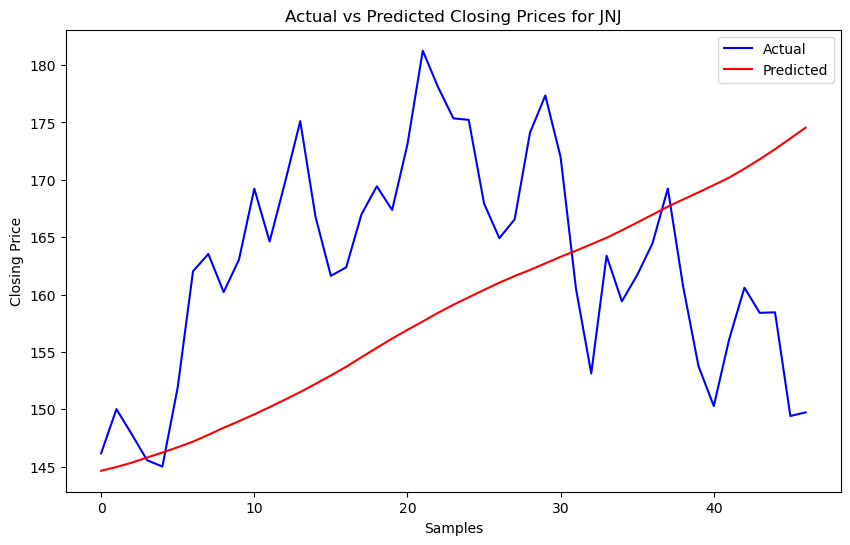

Preparing data for JPM...
Training Linear Regression model for JPM...
JPM - MSE: 446.0563204878694, R2: 0.23825387172091617


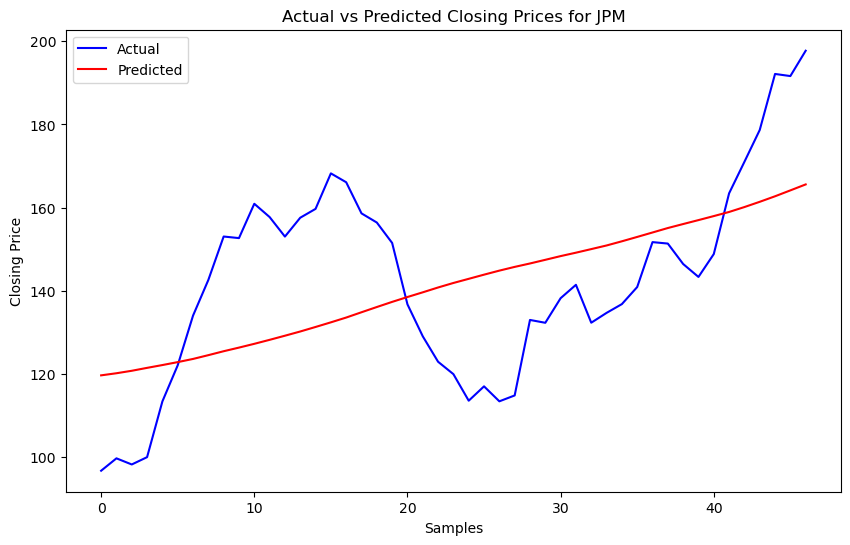

Preparing data for PG...
Training Linear Regression model for PG...
PG - MSE: 175.34173601525336, R2: -1.7661735719440288


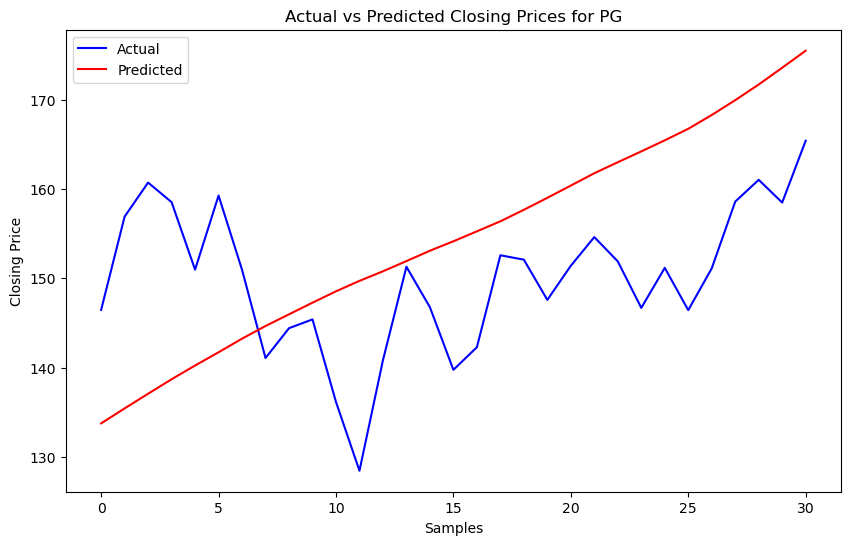

Preparing data for XOM...
Training Linear Regression model for XOM...
XOM - MSE: 328.2702140240112, R2: 0.546462843353213


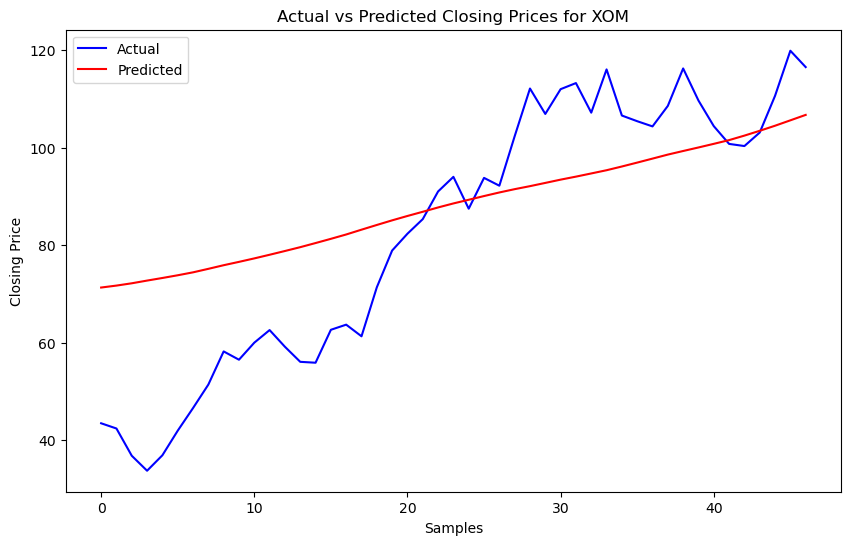

Preparing data for NVDA...
Training Linear Regression model for NVDA...
NVDA - MSE: 147.26476578199458, R2: 0.6623088862953666


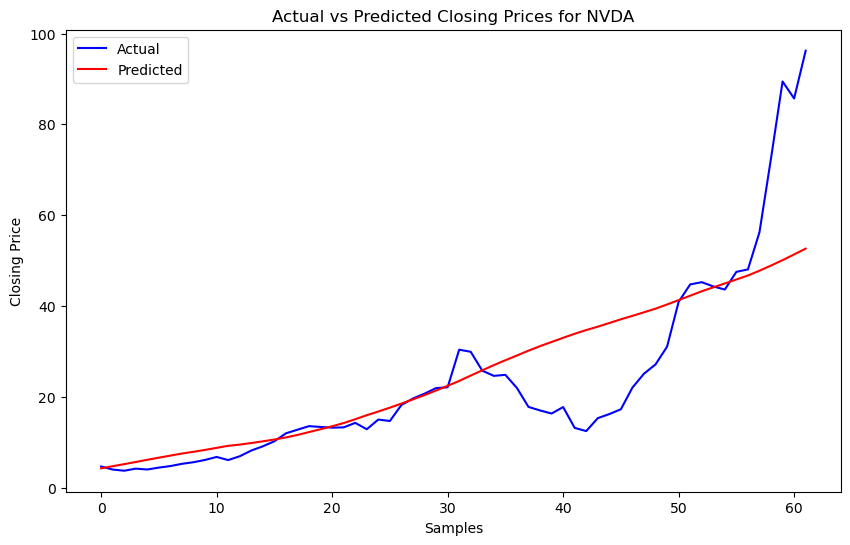

Preparing data for PFE...
Training Linear Regression model for PFE...
PFE - MSE: 69.21843182218096, R2: -0.05573680298068329


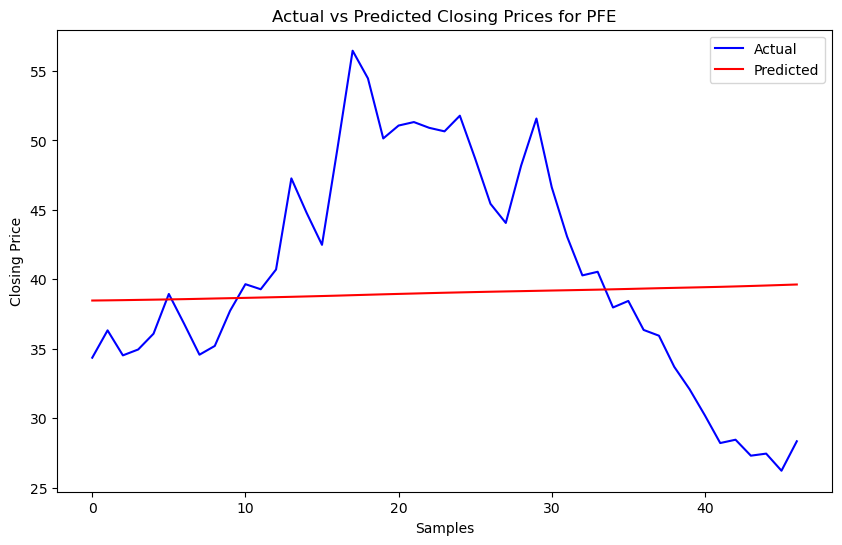

Preparing data for KO...
Training Linear Regression model for KO...
KO - MSE: 15.176765866003477, R2: -1.5770850822127103


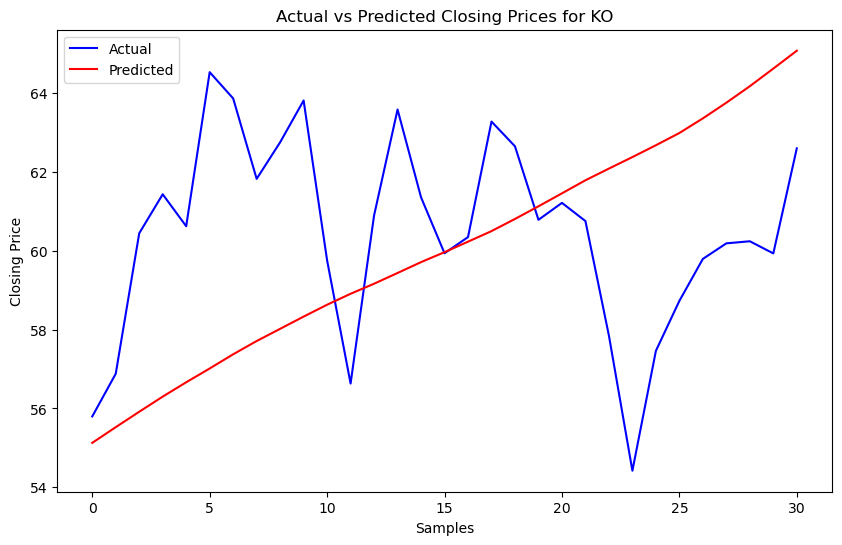

Preparing data for TSLA...
Training Linear Regression model for TSLA...
TSLA - MSE: 7060.8306079572, R2: 0.29489248388793543


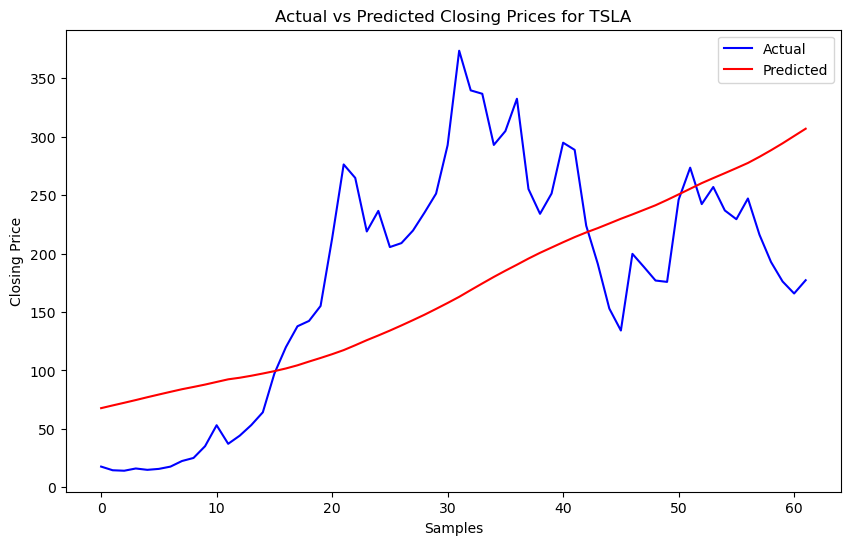

              MSE        R2
AAPL   468.327163  0.760743
MSFT  1508.760100  0.758902
JNJ    174.701871 -1.030427
JPM    446.056320  0.238254
PG     175.341736 -1.766174
XOM    328.270214  0.546463
NVDA   147.264766  0.662309
PFE     69.218432 -0.055737
KO      15.176766 -1.577085
TSLA  7060.830608  0.294892


In [36]:
time_step = 60
n_components = 1 # Number of components recommended

models = {}
scalers = {}
pca_models = {}
results = {}

# Train and evaluate the Linear Regression model for each ticker
for ticker in tickers:
    print(f"Preparing data for {ticker}...")
    try:
        X, y = extract_target(merged_stock_consumers_df, ticker, time_step)
    except KeyError as e:
        print(e)
        continue
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train the Linear Regression model
    print(f"Training Linear Regression model for {ticker}...")
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_pca, y_train)
    
    # Predict the target variable on the test set
    y_pred = lin_reg.predict(X_test_pca)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the model, scaler, PCA model, and results
    models[ticker] = lin_reg
    scalers[ticker] = scaler
    pca_models[ticker] = pca
    results[ticker] = {'MSE': mse, 'R2': r2}
    
    print(f"{ticker} - MSE: {mse}, R2: {r2}")
    
    # Plot the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual', color='b')
    plt.plot(y_pred, label='Predicted', color='r')
    plt.title(f'Actual vs Predicted Closing Prices for {ticker}')
    plt.xlabel('Samples')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

### Discussion of Linear Regression Results

The performance of the Linear Regression model on the stock data shows a wide range of results across different stocks, indicating varying levels of effectiveness in capturing the underlying patterns. The highest performing stocks were AAPL and MSFT with around 76% accuracy for both. It is worth noting the model had an R2 value of 0.66 for NVDA which is not ideal but NVDA is known to be a highly volatile stock and this linear regression model performed better than the SVR model for NVDA with an R2 score of 0.60. 
Apart from APPL, MSFT, NVDA and XOM, the model performed poorly on all the stocks. Incurring a negative R2 value for four out of ten stocks. In general, the linear regression did not accomplish an accuracy score over 77% for any stocks and it seems to have struggled with the given data. 

#### Comparison with SVR Model:

The SVR model showed a generally better performance across most stocks compared to the Linear Regression model:

- **High Performing Stocks:** Both models performed well for AAPL and MSFT, but the SVR model had slightly better R² values and lower MSE, indicating higher accuracy and better fit. 
  - **PFE**: The stark contrast between the LR and the SVR performance on this stock stood out to me. The Linear Regression model performed poorly on Pfizer's stock, with a highly negative R² value of -0.06. In contrast, the SVR model performed exceptionally well on Pfizer's stock, achieving a high R² value of 0.90. This difference can be attributed to SVR's ability to handle non-linear relationships and complexities in the data, which the simpler Linear Regression model could not effectively capture.

- **Moderate to Poor Performing Stocks:** For stocks like JPM and XOM, the SVR model outperformed Linear Regression, showing higher R² values and lower MSE. 

- **Poor Performing Stocks:** In cases where the Linear Regression model performed poorly (e.g., JNJ, PG, PFE, KO, TSLA), the SVR model still managed to provide positive R² values and more reasonable MSE, suggesting better handling of the underlying patterns and noise in the data.

### Conclusion:

In general, the SVR model generally performed better than the LR model, providing higher R² values and lower MSE across most stocks. This indicates that the SVR model is more effective at capturing the complex patterns in the stock and consumer data, making it a better choice for this dataset.

Future directions to improve model performance could include further tuning of the SVR model parameters, using more advanced ensemble methods, or exploring other machine learning algorithms that can better handle the volatility and complexity of stock price data.